In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import math
import collections
from fractions import Fraction
import scipy.integrate
from sympy import integrate

In [4]:
def error_r3(f):
    return f**3 + 3*(1 - f) * f**2

In [5]:
fs = np.linspace(0, 1)

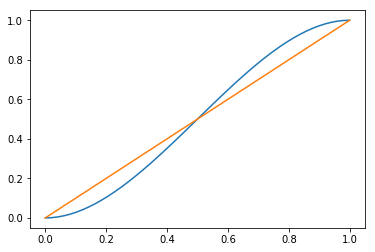

In [6]:
plt.plot(fs, [error_r3(f) for f in fs])
plt.plot(fs, fs)

In [7]:
n = 10000
errors = range(int((n+1)/2), n + 1)

In [8]:
probs = [binom.pmf(x, n, .4) for x in errors]

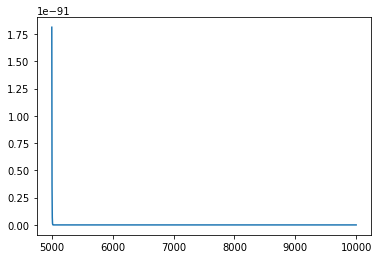

In [9]:
plt.plot(errors, probs)

In [10]:
all_probs = [binom.pmf(x, n, .2) for x in range(1, n + 1)]

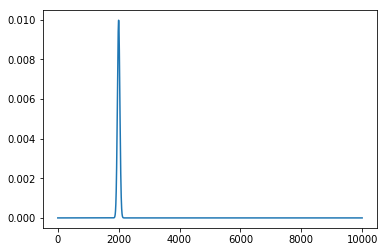

In [11]:
plt.plot(range(1, n + 1), all_probs)

In [12]:
def error_prob(n, f):
    errors = range(int((n+1)/2), n + 1)
    probs = [binom.pmf(x, n, f) for x in errors]
    return sum(probs)

In [13]:
error_prob(3, .1)

0.028000000000000008

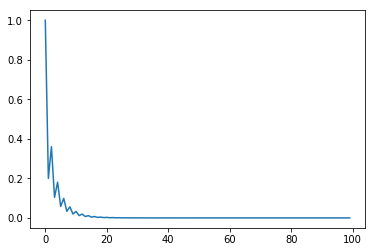

In [14]:
plt.plot(range(100), [error_prob(x, .2) for x in range(100)])

In [15]:
error_prob(70, .2)

2.0547746962292967e-08

In [16]:
n = 1
error = 1
while error > 1e-15:
    error = error_prob(n, .1)
    n += 1
print(n)

64


In [17]:
 64 * (1+(.1 * np.log2(.1) + .9 * np.log2(.9)))

33.984282010286002

In [18]:
142*(1+(.2 * np.log2(.2) + .8 * np.log2(.8)))

39.486210525994551

# Ex. 2.4

# Expectation

In [19]:
def expectation(N, f):
    prob = []
    for x in range(0, N + 1):
        prob.append(x*binom.pmf(x, N, f)) 
    return prob

In [20]:
sum(expectation(5, 0.2))

1.0

In [21]:
sum(expectation(400, 0.2))

79.99999999998758

<BarContainer object of 6 artists>

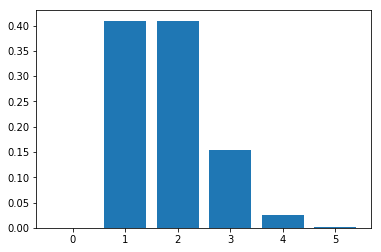

In [22]:
plt.bar(np.arange(len(expectation(5,0.2))), (expectation(5,0.2)))

# Variance and Standard Deviation

In [23]:
def var_desv(N, f):
    res = []
    for x in range(0, N + 1):
        res.append((x**2)*binom.pmf(x, N, f))
    dev = sum(res) - urn(N, f)**2
    
    print ("The Variance is " + str(dev))
    print ("The Standard Deviation is " + str(math.sqrt(dev)))

In [24]:
var_desv(5, 0.2)

NameError: name 'urn' is not defined

# Ex. 2.5

In [ ]:
trials = []
for i in range(1000):
    trials.append(np.random.choice([1, 0], replace=True, p=[0.2, 0.8], size=5).sum())
np.mean(trials)

In [ ]:
plt.hist(trials)
plt.tight_layout()

In [ ]:
trials_bin = []
for i in range(1000):
    trials_bin.append(np.random.binomial(5, 0.2))
plt.hist(trials_bin)
plt.tight_layout()

In [ ]:
def z(N, B, K):
    nb = np.random.choice([1, 0], replace=True, p=[B/K, 1-(B/K)], size=N).sum()
    fb = B/K
    return ((nb - fb*N) ** 2) / (N*fb*(1 - fb))

In [ ]:
trials_z = [z(5,1,5) for i in range(10000)]

In [ ]:
np.mean(trials_z)

In [ ]:
plt.hist(trials_z, bins=range(14), rwidth=0.9)
plt.tight_layout()

In [ ]:
4000/10000

# Ex. 2.6

In [ ]:
def urns(N, nb):
    prob = []
    res = []
    for x in range(0, N + 1):
        prob.append(binom.pmf(nb, N, x/10)) 
    for i in range(0, N + 1):   
        res.append((binom.pmf(nb, N, i/10))/(sum(prob)))
    
    #print ("The most likely urn is urn " + str(res.index(max(res))) + ", with probability " + str(max(res)))
    
    return res

In [ ]:
probs = urns(10, 3)

In [ ]:
probs = urns(10, 3)
plt.bar(np.arange(0,11), probs)

In [ ]:
prob = 0
for u in range(11):
    prob += u/10*(probs[u])
print(prob)


# Ex. 2.7

In [27]:
def factorial(n):
    if (n == 1 or n == 0):
        return 1
    else:
        return n * factorial(n - 1)

In [28]:
def prob_nh_given_N(nh, N):
    return factorial(nh)*factorial(N-nh)/factorial(N+1)

In [29]:
def prob_nh_given_fh_N(nh, fh, N):
    return binom.pmf(nh, N, fh)

In [30]:
def prob_fh_given_nh_N(fh, nh, N):
    return prob_nh_given_fh_N(nh,fh, N)/prob_nh_given_N(nh, N)

In [31]:
probs = []
for i in np.arange(0, 1, 0.01):
    probs.append(prob_fh_given_nh_N(i, 0, 3))

a) N = 3; nh = 0

In [54]:
probs_fh = [prob_fh_given_nh_N(fh, 0, 3) for fh in np.arange(0, 1, 0.01)]

Probability of fh lying between 'a' and 'b':

In [35]:
f = lambda fh: binom.pmf(0, 3, fh)
b = scipy.integrate.quad(f, 0, 0.2)

print(b[0]/prob_nh_given_N(0, 3))

0.5904000000000001


In [36]:
np.trapz(np.array(probs_fh), dx=0.01)

1.0000999800000001

In [56]:
np.trapz(probs, dx=0.01)

1.0000999800000001

In [60]:
probs_fh = [prob_fh_given_nh_N(fh, 0, 5) for fh in np.arange(0, 1, 0.01)]
num = [prob_nh_given_fh_N(0, fh, 5) for fh in np.arange(0, 1, 0.01)]

f = lambda fh: binom.pmf(0, 5, fh)
b = scipy.integrate.quad(f, 0, 1)
den = b[0]

probs = np.array(num)/den

In [61]:
np.mean(np.abs(probs_fh - probs))

1.6637495189354634e-16

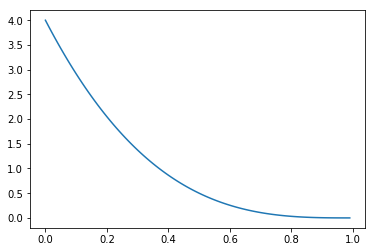

In [37]:
plt.plot(np.arange(0, 1, 0.01), probs)

d) N = 300; nh = 29 

In [44]:
probs_fh = [prob_fh_given_nh_N(fh, 29, 100) for fh in np.arange(0, 1, 0.01)]

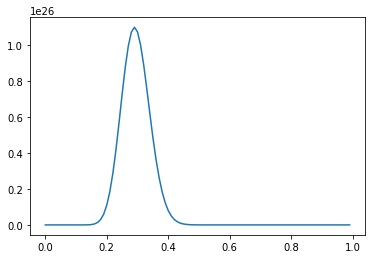

In [45]:
plt.plot(np.arange(0, 1, 0.01), probs_fh)

In [46]:
np.trapz(np.array(probs_fh), dx=0.01)

1.2410847811948198e+25

In [64]:
priors = [4*x for x in np.arange(0, 0.5, 0.01)] + [-4*x + 4 for x in np.arange(0.5, 1, 0.01)]

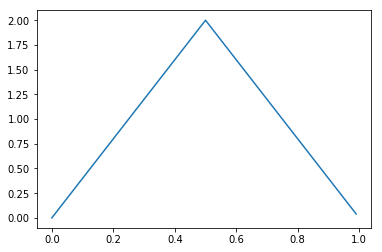

In [70]:
plt.plot(np.arange(0, 1, 0.01), priors)

In [65]:
np.trapz(np.array(priors), dx=0.01)

0.99979999999999947

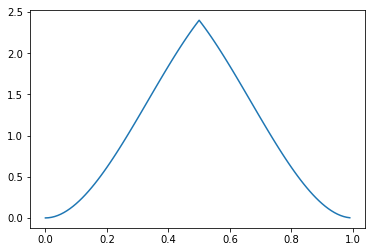

In [84]:
num_p1 = [prob_nh_given_fh_N(1, fh, 2) for fh in np.arange(0, 1, 0.01)]
den = num_p1 * np.array(priors)

den = np.trapz(den, dx=0.01)

probs = np.array(num_p1)*priors/den

plt.plot(np.arange(0, 1, 0.01), probs)

In [78]:
np.trapz(probs, dx=0.01)

0.99999999999999989

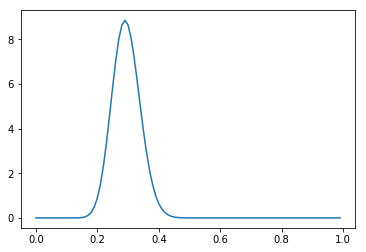

In [51]:
plt.plot(np.arange(0, 1, 0.01), probs)

In [52]:
np.trapz(probs, dx=0.01)

0.999999999999998

# Ex. 2.16

a) 

In [14]:
def dice_out(f):
    dice_outcomes = []
    for i in range(1, f + 1):
        for j in range(1, f + 1):
            dice_outcomes.append(i + j) 
    return dice_outcomes

In [15]:
def count(f):
    count = []
    for x in range(2, f*2 + 1):
        count.append(dice_out(f).count(x))
    return count

In [16]:
def dice_pr(f):
    dice_probs = []
    for x in range(0, f*2 - 1):
        dice_probs.append(((count(f)[x])/f**2))
    return dice_probs

<BarContainer object of 11 artists>

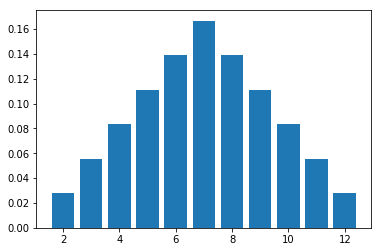

In [17]:
plt.bar(np.arange(2, len(dice_pr(6)) + 2), dice_pr(6))

b)

In [13]:
def expectation(f):
    exp = 0
    i = 2
    for x in range (0, f*2 - 1):
        exp = exp + (dice_pr(f)[x])*i
        i += 1
    return exp

In [19]:
expectation(30)

31.000000000000004

100 dice: prob. distribution, mean and standard deviation

In [61]:
trials = np.random.choice(np.arange(1,7), size=1000) + np.random.choice([0,6], size=1000)

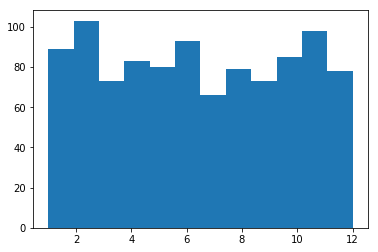

In [62]:
plt.hist(trials, bins=12)
plt.show()

# Ex. 2.21

In [100]:
p = [0.1, 0.2, 0.7]
f = [10, 5, 10/7]
exp = 0
for x in range(3):
    exp += p[x]*f[x]
print(exp)

3.0


In [117]:
exp_2 = 0
for x in range(3):
    exp_2 += p[x]*(1/p[x])
print(exp_2)

3.0
